In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
# import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
X  = pd.read_csv("C:/Users/Lenovo/pykan-master/data/2023河南伪样本的均值/inputaverage地形.csv")
y  = pd.read_csv("E:/【】博士论文写作/全球机器学习识别研究/论文代码参考/KAN：Kolmogorov–Arnold Networks/KAN-main/soydata/targe2019-09-15.csv")

In [30]:
# 1. 计算皮尔逊相关系数矩阵
corr_matrix = X.corr()

# 设定相关系数阈值 (例如 0.90)，识别出相关性较强的特征对
high_corr = np.where(corr_matrix >= 0.90)

# 创建一个字典来存储相关性较强的特征，仅限于正相关的特征对
corr_pairs = {}
for i, j in zip(*high_corr):
    if i != j and corr_matrix.iloc[i, j] > 0:  # 只考虑正相关，且相关系数大于0.90
        corr_pairs[(X.columns[i], X.columns[j])] = corr_matrix.iloc[i, j]

# 输出相关性较强的正相关特征对
print("相关性较强的正相关特征对：", corr_pairs)

相关性较强的正相关特征对： {}


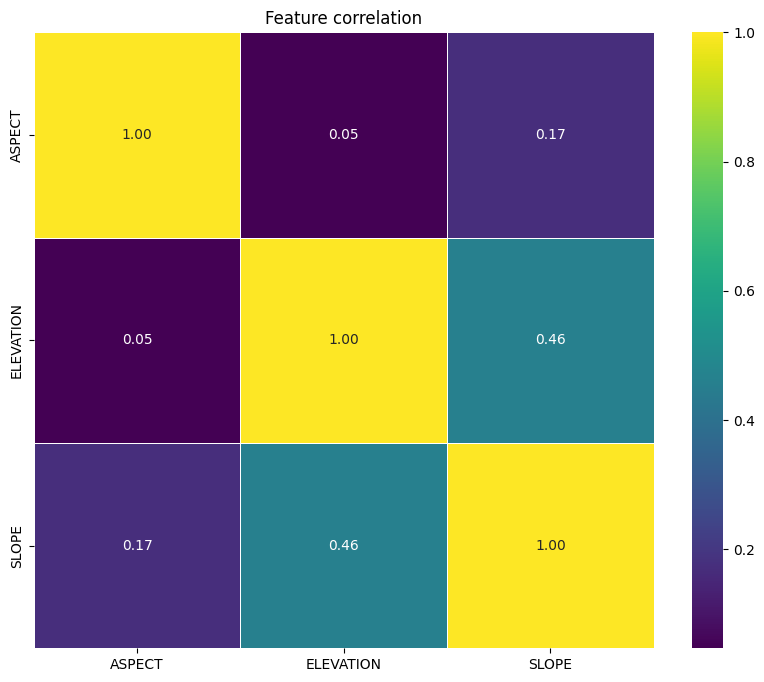

In [31]:
# 绘制相关性热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# 更换颜色调色板为 'viridis'
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)


plt.title("Feature correlation")
plt.show()

In [45]:
# 2. 计算每个特征与目标变量的互信息
mutual_info_values = mutual_info_regression(X, y)

D:\Anaconda\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print("互信息：", mutual_info_values)

互信息： [0.08607164 0.09048031 0.06360426 0.07526173 0.08289188 0.09139069
 0.02745675 0.04155245 0.12678671 0.15238081 0.12790477 0.0704315
 0.13070514 0.12177322 0.15581747 0.02133931 0.01659641 0.00017111
 0.021745   0.07152872 0.08967243 0.13032342 0.04670694 0.07766916
 0.08967243 0.0919398  0.12541332 0.06804384 0.0523007  0.03032884
 0.04608407 0.11138874 0.0227166  0.04231509 0.04345938 0.08521977
 0.09532126 0.04257132 0.03897719 0.04810542 0.04019097 0.07405777
 0.0746251  0.04244484 0.08404849 0.10170287 0.08273798 0.03875785
 0.02121056 0.02596926 0.08847045 0.07720256 0.01095053 0.0194896
 0.01958705 0.03853255 0.0192062  0.12383413 0.03442869 0.05027037
 0.0403764  0.06596282 0.05277721 0.07404133 0.08391785 0.04341379
 0.08369458 0.10461214 0.07678198 0.04768076 0.06308394 0.05957605
 0.03028709 0.09230903 0.07766436 0.09068637 0.09231513 0.07788202
 0.04621756 0.10522552 0.01151259 0.07773697 0.08628199 0.0674981
 0.02299289 0.06092743 0.03168918 0.08427623 0.08960604 0.04

In [47]:
# 将互信息值从大到小排列
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info_values})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df.to_string(index=False))

      Feature  Mutual Information
           B5            0.155817
          B11            0.152381
        SLOPE            0.146483
          XXX            0.137167
           B3            0.130705
         BITM            0.130323
          B12            0.127905
         AWEI            0.126787
   Brightness            0.125413
          ZZZ            0.124030
    ELEVATION            0.123834
           B4            0.121773
         CARI            0.111389
       WRIyou            0.111232
         NDRE            0.111209
         SR65            0.111134
      Wetness            0.106119
           MI            0.105226
         GRAY            0.104612
         SeLI            0.102244
        SR8a5            0.102231
         PWRI            0.101846
        CIyou            0.101703
        SIWSI            0.098866
         NDBI            0.098758
          NR1            0.095397
         SR85            0.095337
          CI1            0.095321
         PSRI 

In [48]:
# 3. 逐步删除与互信息较大的特征相关性较强的特征
selected_features = list(mutual_info_df['Feature'])  # 互信息值排序后的特征列表
remaining_features = selected_features.copy()  # 用于存储剩余的特征
# 按照互信息值从大到小，依次检查和删除高度相关的特征
for feature in selected_features:
    if feature in remaining_features:
        # 获取当前特征与其他特征之间的相关性
        correlated_features = [f for f in remaining_features if abs(corr_matrix[feature][f]) >= 0.90 and f != feature]
        
        # 删除与当前特征高度相关的特征
        for corr_feature in correlated_features:
            remaining_features.remove(corr_feature)

In [49]:
print("最终保留的特征：", remaining_features)

最终保留的特征： ['B5', 'B11', 'SLOPE', 'ELEVATION', 'WRIyou', 'SR65', 'Wetness', 'MI', 'PWRI', 'CIyou', 'NDBI', 'PSRI', 'MDI1', 'SR118', 'ASPECT', 'ARI', 'WI', 'SR42', 'MVI', 'SR38', 'NGRDI', 'SIPI', 'BRI', 'DCNI', 'FDI', 'BAIS2', 'S2WI', 'B2', 'REIP', 'C3I1', 'MNDWI', 'ARI2', 'LAIbrown', 'NBWI', 'C3I2', 'CI4', 'NDRI2', 'C3I4', 'SR53', 'CCC', 'GEMI', 'NR2', 'AVVVH', 'CIEX', 'CI3', 'CRI550', 'EMBI', 'REDVI', 'VI700', 'kndvi', 'CVI', 'MNSI', 'B8A', 'CSDI', 'NDLI', 'DVHVV', 'RFDI', 'NDYI', 'SVHVV', 'NMDI']


In [9]:
import pandas as pd

In [ ]:
# final_selected_features = ['NDBI', 'MVI', 'MI', 'AVVVH','VV','VH', 'MVHVV','GEMI', 'Wetness', 'SR38', 'B8A', 'BNDVI', 'CARrededge', 'REDVI', 'CVI', 'S2WI', 'WRIyou', 'B11', 'EMBI', 'SIPI', 'S2REP', 'MNSI', 'C3I3', 'NDTI', 'PSRI', 'SR45', 'GRAY', 'EXG', 'NDWIt2', 'BITM', 'NDYI', 'NMDI', 'WI', 'ARI', 'NDWIt', 'B5', 'BRI', 'RFDI', 'DVVVH', 'DVHVV', 'MIRBI', 'SLOPE', 'SR53', 'DCNI', 'CIEX', 'PWRI', 'NR3', 'ASPECT', 'CI4', 'NDRI2', 'ELEVATION', 'CARI', 'SVHVV', 'NPNC', 'SR24']

In [ ]:
#0915

# final_selected_features = ['B11', 'PSRI', 'VARIgreen', 'SLOPE', 'WI', 'NPNC', 'NDBI', 'C3I2', 'SR24', 'MBI', 'BaI', 'Brightness', 'AVVVH', 'EXG', 'ARVI', 'WRIyou', 'VI700', 'CIyou', 'SR84', 'EWI', 'CCC', 'MVI', 'mARI', 'CSDI', 'NBR2', 'MI', 'ARI', 'SWM', 'Greenness', 'NDWIt', 'ASPECT', 'BITM', 'S2WI', 'SR124', 'CRI550', 'BRI', 'SR1211', 'CI4', 'NBWI', 'MNSI', 'NR3', 'GEMI', 'YYY', 'ELEVATION', 'SR812', 'C3I4', 'BAIS2', 'SR53', 'NDYI', 'CI2', 'NDLI', 'CVI', 'REIP', 'DCNI', 'DPRVI', 'DVHVV', 'kndvi', 'NMDI', 'AVI', 'SVHVV', 'CIEX']

In [ ]:
#0815
# final_selected_features = ['S2REP', 'CI2', 'C3I2', 'C3I1', 'NDLI', 'kndvi', 'CARI', 'B8A', 'SeLI', 'TCARIdivOSAVI', 'Brightness', 'DCNI', 'NDNI', 'SR54', 'WFI', 'CVI', 'MDI1', 'MI', 'B12', 'B5', 'MNSI', 'SR128', 'PWRI', 'CIEX', 'MVI', 'Wetness', 'SR83', 'SR38', 'CIyou', 'B11', 'SLOPE', 'CIVE', 'SDWI', 'MVHVV', 'B6', 'SR53', 'B4', 'VARIgreen', 'C3I4', 'B2', 'NMDI', 'SIPI', 'CSDI', 'CARgreen', 'PSRI', 'ASPECT', 'NPNC', 'CI3', 'CI4', 'ARI', 'ARI2', 'WI', 'ELEVATION', 'SR124', 'BRI', 'DVVVH', 'DVHVV', 'EMBI', 'NBWI', 'NDWIt', 'S2WI', 'NDYI', 'CI', 'SVHVV']

In [ ]:
#0715
# final_selected_features = ['REIP', 'C3I1', 'TCARIdivOSAVI', 'NR2', 'C3I2', 'CARI', 'DCNI', 'B5', 'CI1', 'CIEX', 'PWRI', 'NDLI', 'NDBI', 'CIEY', 'kndvi', 'CVI', 'EVI', 'MI', 'XXX', 'WRIyou', 'SLOPE', 'GEMI', 'BAIS2', 'SR38', 'SDWI', 'MVHVV', 'C3I4', 'SR811', 'B7', 'ARVI', 'MNSI', 'RVI', 'NMDI', 'MVI', 'ZZZ', 'B6', 'SR53', 'B11', 'CIyou', 'Wetness', 'SR82', 'VI700', 'NRGBI', 'CI3', 'SIPI', 'CIVE', 'VH', 'DBSI', 'RFDI', 'ASPECT', 'DVHVV', 'EWI', 'PSRI', 'WI', 'CI4', 'NPNC', 'B2', 'ELEVATION', 'NDWIt', 'ARI', 'BRI', 'SR42', 'EMBI', 'SVHVV', 'NDWIt2', 'S2WI', 'NDYI', 'SR124', 'CRI550', 'ARI2']

In [10]:
# #0615
# final_selected_features = ['MBI', 'MI', 'MVI', 'AWEI', 'AVVVH', 'EWI', 'NDBI', 'mARI', 'NBR2', 'CCC', 'MFI', 'SR45', 'CARgreen', 'CSDI', 'WRIyou', 'S2WI', 'SLOPE', 'SR24', 'WRI', 'WFI', 'PSRI', 'SR43', 'SIPI', 'B6', 'WI', 'NPNC', 'NBRSWIR', 'C3I2', 'NDYI', 'CVI', 'BITM', 'DNVI', 'SR124', 'EMBI', 'ASPECT', 'NDWIt', 'NMDI', 'BRI', 'REDVI', 'PWRI', 'C3I4', 'REVI', 'CI3', 'ELEVATION', 'GRAY', 'CI4', 'NDSoiI', 'DPRVI', 'DVHVV', 'MNSI', 'DCNI', 'C3I1', 'SVHVV', 'CIEX', 'REIP', 'CARI']

In [20]:
#大豆0615
final_selected_features = ['Brightness', 'SLOPE', 'AWEI', 'ELEVATION', 'NDBI', 'CARI', 'ASPECT', 'B5', 'PWRI', 'MVI', 'ARI', 'BRI', 'TCARIdivOSAVI', 'DBSI', 'SeLI', 'S2REP', 'MI', 'PSRI', 'SR1112', 'SIPI', 'B2', 'SR82', 'SR24', 'VH', 'NPNC', 'SR38', 'REVI', 'SR45', 'NR2', 'NDWIt', 'AVI', 'S2WI', 'CCC', 'EMBI', 'SVHVV', 'WI', 'NDSoiI', 'C3I4', 'SDWI', 'MVHVV', 'DCNI', 'CVI', 'DPRVI', 'DVHVV', 'CRI550', 'NDRI2', 'NDYI', 'NDWIt2', 'CI3', 'B6', 'NDLI', 'NR4', 'MNSI', 'CIEX', 'C3I3', 'NMDI', 'C3I2']

In [30]:
#大豆0715
final_selected_features = ['B6', 'MIRBI', 'XXX', 'MFI', 'GEMI', 'B11', 'MNSI', 'NDBI', 'SLOPE', 'CIyou', 'CARI', 'CIEX', 'NDRI', 'DCNI', 'TCARIdivOSAVI', 'ELEVATION', 'MNDWI', 'ASPECT', 'BAIS2', 'SWM', 'SR65', 'SDWI', 'MVHVV', 'BRI', 'S2REP', 'C3I2', 'B5', 'ZZZ', 'C3I1', 'BaI', 'SR82', 'EXG', 'DVVVH', 'DVHVV', 'SR45', 'NBRSWIR', 'SR43', 'ARI2', 'NMDI', 'CVI', 'REVI', 'C3I4', 'EMBI', 'MI', 'ARI', 'PWRI', 'NDWIt2', 'S2WI', 'WRIyou', 'SIPI', 'NDYI', 'BITM', 'CSDI', 'REDVI', 'C3I3', 'CI2', 'PSRI', 'SVHVV', 'WI', 'SIWSI', 'CRI550', 'SR811', 'NPNC', 'NR3', 'Wetness', 'MVI', 'NR4', 'SR24']

In [40]:
#大豆0815
final_selected_features = ['B6', 'MFI', 'XXX', 'MIRBI', 'MNSI', 'B11', 'ZZZ', 'SLOPE', 'NDPI', 'RVI', 'CCC', 'BI', 'EXG', 'CIyou', 'ELEVATION', 'WRI', 'MDI1', 'CARrededge', 'MVI', 'VARIgreen', 'MI', 'SR45', 'BRI', 'SR124', 'ASPECT', 'NBRSWIR', 'C3I1', 'REDVI', 'CARI', 'CIEX', 'NMDI', 'NDWIt', 'PSRI', 'C3I2', 'VV', 'SDWI', 'DCNI', 'Wetness', 'TCARIdivOSAVI', 'NDYI', 'REVI', 'SIPI', 'NBWI', 'B5', 'WI', 'CI2', 'CVI', 'ARI', 'SR24', 'B4', 'B2', 'RFDI', 'DVHVV', 'C3I4', 'EMBI', 'VH', 'SVHVV', 'NPNC', 'CI3', 'S2WI', 'PWRI', 'NR4']

In [50]:
#大豆0815
final_selected_features = ['B5', 'B11', 'SLOPE', 'ELEVATION', 'WRIyou', 'SR65', 'Wetness', 'MI', 'PWRI', 'CIyou', 'NDBI', 'PSRI', 'MDI1', 'SR118', 'ASPECT', 'ARI', 'WI', 'SR42', 'MVI', 'SR38', 'NGRDI', 'SIPI', 'BRI', 'DCNI', 'FDI', 'BAIS2', 'S2WI', 'B2', 'REIP', 'C3I1', 'MNDWI', 'ARI2', 'LAIbrown', 'NBWI', 'C3I2', 'CI4', 'NDRI2', 'C3I4', 'SR53', 'CCC', 'GEMI', 'NR2', 'AVVVH', 'CIEX', 'CI3', 'CRI550', 'EMBI', 'REDVI', 'VI700', 'kndvi', 'CVI', 'MNSI', 'B8A', 'CSDI', 'NDLI', 'DVHVV', 'RFDI', 'NDYI', 'SVHVV', 'NMDI']

In [51]:
X_selected = X[final_selected_features]
# 保存为 CSV 文件，指定保存路径
X_selected.to_csv('E:/【】博士论文写作/全球机器学习识别研究/论文代码参考/KAN：Kolmogorov–Arnold Networks/KAN-main/soydata/selected_features20190915.csv', index=False)

In [ ]:
# 4. 可视化相关性矩阵（如果需要）
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()